<a href="https://colab.research.google.com/github/sherna90/inteligencia_artificial/blob/master/7.-redes_neuronales_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


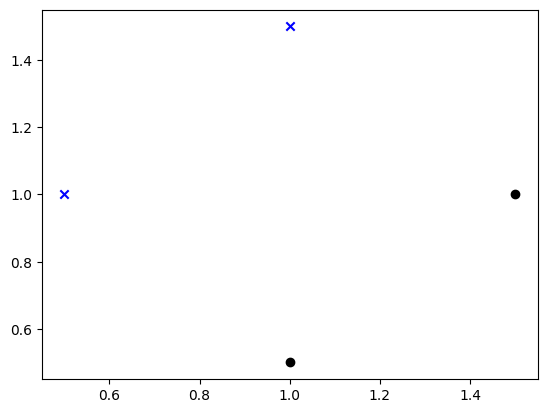

In [4]:
import numpy as np
import random 
import matplotlib.pyplot as plt


X=np.array([[1,0.5],[1.5,1],[0.5,1],[1,1.5]])
y=np.array([0,0,1,1]).T
plt.scatter(X[0:2,0],X[0:2,1],marker='o',c='k')
plt.scatter(X[2:4,0],X[2:4,1],marker='x',c='b')

\begin{align*}J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))\end{align*}

In [6]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.matmul(inputs, weights))

def training_loss(inputs,targets,weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = np.log(preds) * targets + np.log(1 - preds) * (1 - targets)
    return -np.mean(label_probabilities)

\begin{align*}
\frac{\partial }{\partial \theta_j} L(\theta) &= -\frac{1}{m}\sum\limits_{i=1}^{m}{y_i.\frac{\partial }{\partial \theta_j} log P(y_i|x_i,\theta)   + (1-y_i).\frac{\partial }{\partial \theta_j} \log{(1 - P(y_i|x_i,\theta))}} \\
&=-\frac{1}{m}\sum\limits_{i=1}^{m}{y_i.x_i^j.\left(1-P(y_i|x_i,\theta)\right) - (1-y_i).x_i^j.P(y_i|x_i,\theta)} \\
&=-\frac{1}{m}\sum\limits_{i=1}^{m}{y_i.x_i^j - x_i^j.P(y_i|x_i,\theta)} \\
&=\frac{1}{m}\sum\limits_{i=1}^{m}{(P(y_i|x_i,\theta)-y_i).x_i^j}
\end{align*}

In [7]:
def log_sigmoid_derivative(x):
  return 1.0/(1.0+np.exp(x))

def training_loss_derivative(inputs,targets,weights):
  preds = logistic_predictions(weights, inputs)
  return np.mean((preds-targets.reshape((-1,1)))*inputs,axis=0)

In [8]:
w=np.random.normal(0,1,2).reshape((-1,1))

In [9]:
training_loss_derivative(X,y,w)

array([-0.28717072, -0.50700757])

https://math.stackexchange.com/questions/2320905/obtaining-derivative-of-log-of-sigmoid-function

In [10]:
loss_val=list()
for i in range(100):
    w -= training_loss_derivative(X,y,w).reshape((-1,1)) * 0.01
    loss_val.append(training_loss(X,y,w))

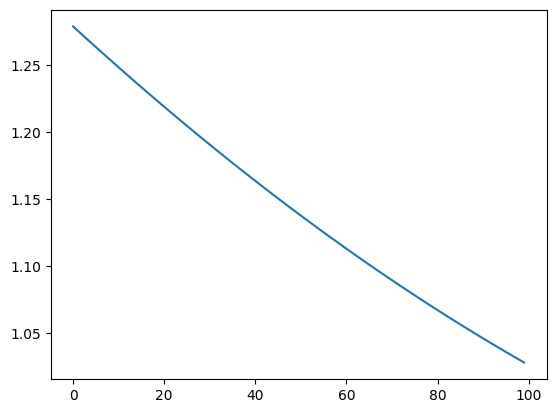

In [11]:
plt.plot(loss_val)

In [12]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [13]:
Z=logistic_predictions(w,np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

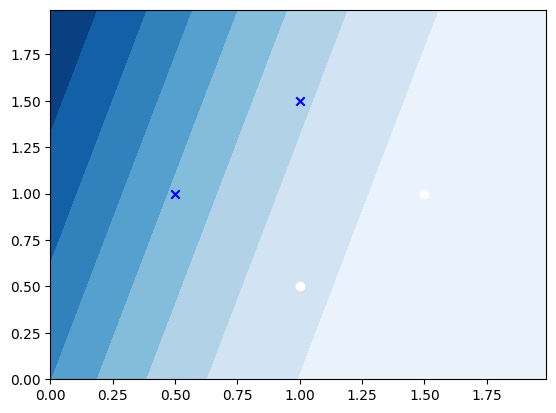

In [14]:
plt.figure(figsize=(15,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)
plt.scatter(X[0:2,0],X[0:2,1],marker='o',c='w')
plt.scatter(X[2:4,0],X[2:4,1],marker='x',c='b')

# Tensorflow

In [24]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100,shuffle=True,noise=0.3)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

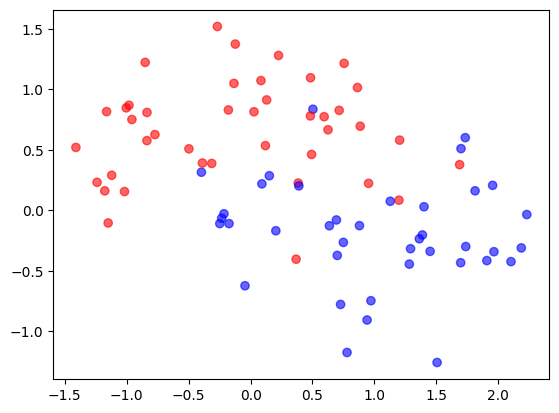

In [26]:
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(15,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6)

In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras import regularizers

model = Sequential()
model.add(Input(2))
model.add(Dense(1,activation='sigmoid',use_bias=False))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs=5000
opt = SGD(1e-3)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=epochs, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)

2022-11-08 16:50:03.901052: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-08 16:50:04.131179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-08 16:51:10.811203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


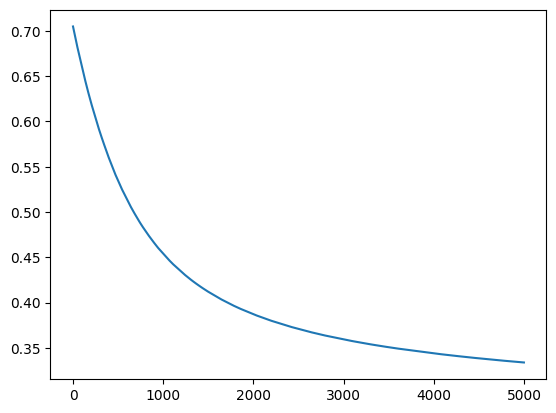

In [32]:
plt.plot(history.history["loss"])

In [39]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
print(classification_report(y_test, np.int32(y_pred>0.5)))


1/1 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.80      0.73      0.76        11

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



In [40]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

6096/6096 [==============================] - 7s 1ms/step


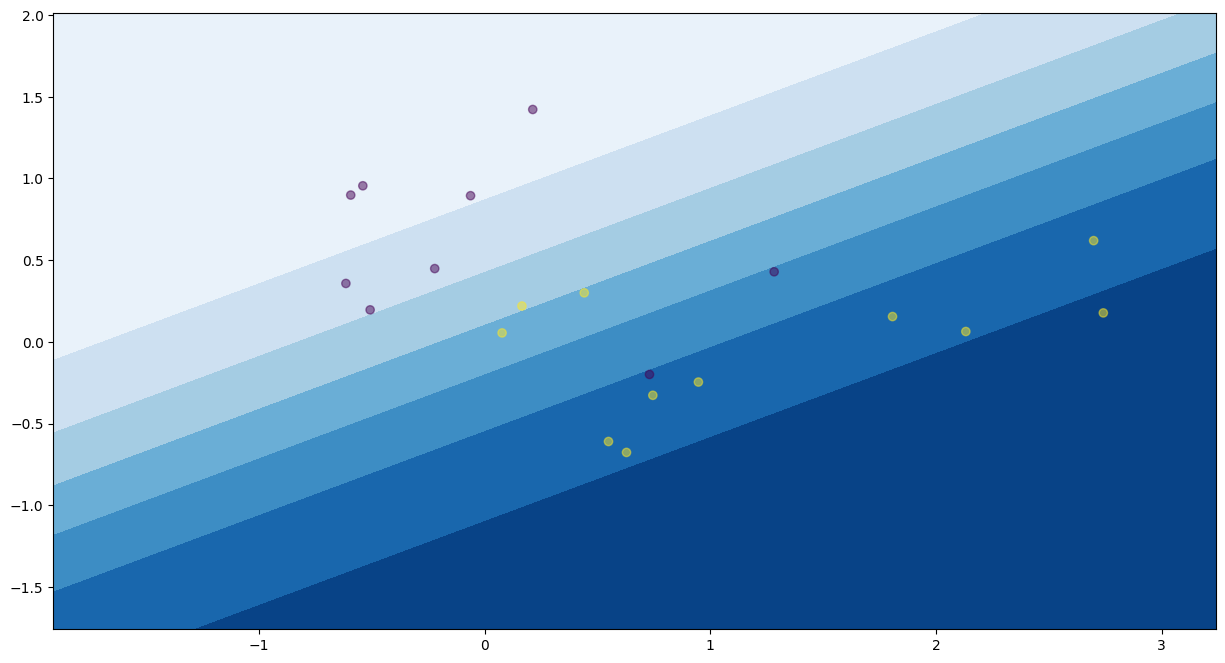

In [41]:
plt.figure(figsize=(15,8))

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=.5)


# Redes Neuronales Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop,SGD

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train=x_train.reshape((-1,784))
x_test=x_test.reshape((-1,784))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Input(784))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.summary()



In [ ]:
784*10+10

In [ ]:
epochs=100
sgd = SGD(lr=0.01, decay=0, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print(score)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0, epochs)
plt.style.use("ggplot")

fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1, 2, 1)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Train/Val Loss (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Train/Val Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
print(input_shape)
print(num_classes)

In [ ]:
from keras.layers import Conv2D,MaxPooling2D



In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu",padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu",padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape


In [ ]:
def log_loss(y_pred,y_true):
  return -1.0*np.mean(y_true*np.log(y_pred))

In [ ]:
theta=np.random.beta(1,1,size=y_train.shape)

In [ ]:
prob=theta/np.repeat(np.sum(theta,axis=1),repeats=10).reshape(theta.shape)

In [ ]:
log_loss(prob,y_train)

In [ ]:
x_train=np.expand_dims(x_train,3)
x_test=np.expand_dims(x_test,3)

In [ ]:
x_train.shape

In [ ]:
epochs=100
sgd = SGD(lr=0.01, decay=0, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0, epochs)
plt.style.use("ggplot")

fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(1, 2, 1)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Train/Val Loss (Convolutional NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Train/Val Accuracy (Convolutional NN)")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()